In [1]:
from genetic import *
from tqdm import tqdm
from main import run_layer_pso, run_architecture_pso, run_weight_pso
import numpy as np

In [2]:
population_sizes = [10, 25, 50]
iterations = [10, 100, 500]

y = []
x = []
for pop_size in population_sizes:
    for it in iterations:
        mse_s = []
        for i in tqdm(range(100)):
            ga = Genetic_algo()
            best_network, iterations_to_converge = ga.run(pop_size, it)
            train_mse = evaluate_train(best_network)
            mse_s.append(train_mse)
        y.append(np.median(mse_s) * np.std(mse_s))
        x.append(iterations_to_converge)

100%|██████████| 100/100 [1:36:30<00:00, 57.90s/it] 


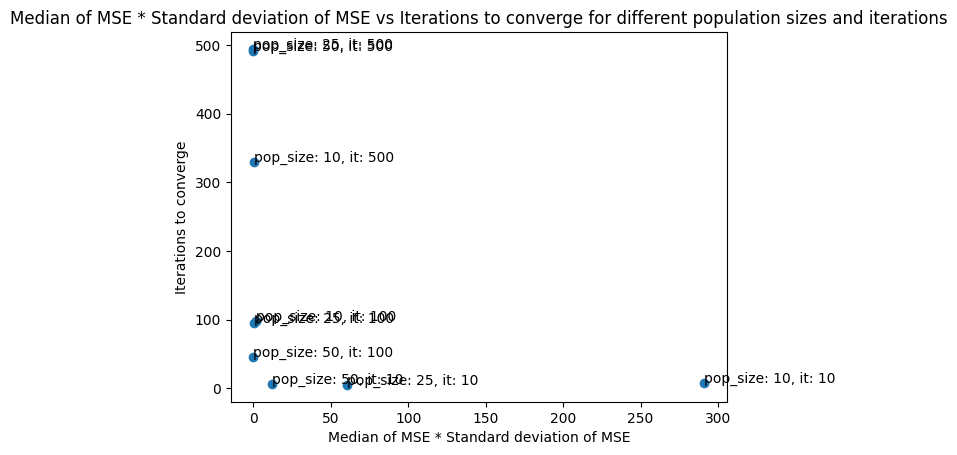

In [3]:
# plot results of medians on x and stds on y, and each point is labelled with the corresponding population size and iterations
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i, txt in enumerate([f'pop_size: {pop_size}, it: {it}' for pop_size in population_sizes for it in iterations]):
    ax.annotate(txt, (y[i], x[i]))
plt.scatter(y, x)
plt.xlabel('Median of MSE * Standard deviation of MSE')
plt.ylabel('Iterations to converge')
plt.title('Median of MSE * Standard deviation of MSE vs Iterations to converge for different population sizes and iterations')
plt.show()

In [4]:
inner_pso_particles = [10, 25]
inner_pso_iterations = [10, 25]
middle_pso_particles = [5, 10]
middle_pso_iterations = [5, 10]
outer_pso_particles = [5]
outer_pso_iterations = [5]

y = []
x = []
for inner_pso_particle in inner_pso_particles:
    for inner_pso_iteration in inner_pso_iterations:
        for middle_pso_particle in middle_pso_particles:
            for middle_pso_iteration in middle_pso_iterations:
                for outer_pso_particle in outer_pso_particles:
                    for outer_pso_iteration in outer_pso_iterations:
                        mse_s = []
                        for i in range(10):
                            best_layers, _ = run_layer_pso(outer_pso_particle, outer_pso_iteration, middle_pso_particle, middle_pso_iteration, inner_pso_particle, inner_pso_iteration)
                            best_n_layers = int(round(best_layers[0]))
                            best_arch, _ = run_architecture_pso(best_n_layers, middle_pso_particle, middle_pso_iteration, inner_pso_particle, inner_pso_iteration)
                            best_hidden = best_arch[1:-3].astype(int)
                            final_weights, train_mse = run_weight_pso(best_n_layers,best_hidden, inner_pso_particle, inner_pso_iteration)
                            mse_s.append(train_mse)
                        y.append(np.std(mse_s))
                        x.append(np.median(mse_s))
                        print("Done for ", inner_pso_particle, inner_pso_iteration, middle_pso_particle, middle_pso_iteration, outer_pso_particle, outer_pso_iteration)
                    

Done for  10 10 5 5 5 5
Done for  10 10 5 10 5 5
Done for  10 10 10 5 5 5
Done for  10 10 10 10 5 5
Done for  10 25 5 5 5 5
Done for  10 25 5 10 5 5
Done for  10 25 10 5 5 5
Done for  10 25 10 10 5 5
Done for  25 10 5 5 5 5
Done for  25 10 5 10 5 5
Done for  25 10 10 5 5 5
Done for  25 10 10 10 5 5
Done for  25 25 5 5 5 5
Done for  25 25 5 10 5 5
Done for  25 25 10 5 5 5
Done for  25 25 10 10 5 5


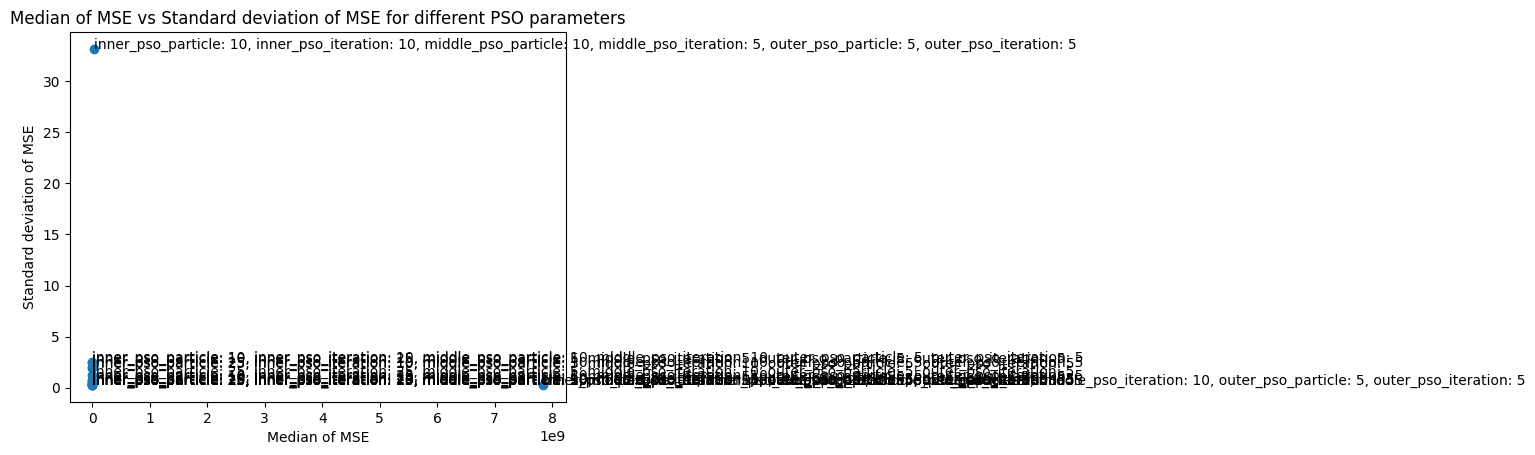

In [5]:
# plot results of medians on x and stds on y, and each point is labelled with the corresponding population size and iterations
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i, txt in enumerate([f'inner_pso_particle: {inner_pso_particle}, inner_pso_iteration: {inner_pso_iteration}, middle_pso_particle: {middle_pso_particle}, middle_pso_iteration: {middle_pso_iteration}, outer_pso_particle: {outer_pso_particle}, outer_pso_iteration: {outer_pso_iteration}' for inner_pso_particle in inner_pso_particles for inner_pso_iteration in inner_pso_iterations for middle_pso_particle in middle_pso_particles for middle_pso_iteration in middle_pso_iterations for outer_pso_particle in outer_pso_particles for outer_pso_iteration in outer_pso_iterations]):
    ax.annotate(txt, (y[i], x[i]))
    
plt.scatter(y, x)
plt.xlabel('Median of MSE')
plt.ylabel('Standard deviation of MSE')
plt.title('Median of MSE vs Standard deviation of MSE for different PSO parameters')
plt.show()

In [13]:
# Convert to dataframe
import pandas as pd
df = pd.DataFrame({'Median of MSE': x, 'Standard deviation of MSE': y})
# add combinations of PSO parameters
df['inner_pso_particle'] = [inner_pso_particle for inner_pso_particle in inner_pso_particles for inner_pso_iteration in inner_pso_iterations for middle_pso_particle in middle_pso_particles for middle_pso_iteration in middle_pso_iterations for outer_pso_particle in outer_pso_particles for outer_pso_iteration in outer_pso_iterations]
df['inner_pso_iteration'] = [inner_pso_iteration for inner_pso_particle in inner_pso_particles for inner_pso_iteration in inner_pso_iterations for middle_pso_particle in middle_pso_particles for middle_pso_iteration in middle_pso_iterations for outer_pso_particle in outer_pso_particles for outer_pso_iteration in outer_pso_iterations]
df['middle_pso_particle'] = [middle_pso_particle for inner_pso_particle in inner_pso_particles for inner_pso_iteration in inner_pso_iterations for middle_pso_particle in middle_pso_particles for middle_pso_iteration in middle_pso_iterations for outer_pso_particle in outer_pso_particles for outer_pso_iteration in outer_pso_iterations]
df['middle_pso_iteration'] = [middle_pso_iteration for inner_pso_particle in inner_pso_particles for inner_pso_iteration in inner_pso_iterations for middle_pso_particle in middle_pso_particles for middle_pso_iteration in middle_pso_iterations for outer_pso_particle in outer_pso_particles for outer_pso_iteration in outer_pso_iterations]
df['outer_pso_particle'] = [outer_pso_particle for inner_pso_particle in inner_pso_particles for inner_pso_iteration in inner_pso_iterations for middle_pso_particle in middle_pso_particles for middle_pso_iteration in middle_pso_iterations for outer_pso_particle in outer_pso_particles for outer_pso_iteration in outer_pso_iterations]
df['outer_pso_iteration'] = [outer_pso_iteration for inner_pso_particle in inner_pso_particles for inner_pso_iteration in inner_pso_iterations for middle_pso_particle in middle_pso_particles for middle_pso_iteration in middle_pso_iterations for outer_pso_particle in outer_pso_particles for outer_pso_iteration in outer_pso_iterations]
df.to_csv('pso_results.csv')